In [20]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from IPython.display import Image
from statistics import mode
from scipy.stats import skew, kurtosis, norm, lognorm, genextreme


# Set the current working directory
os.chdir(sys.path[0])

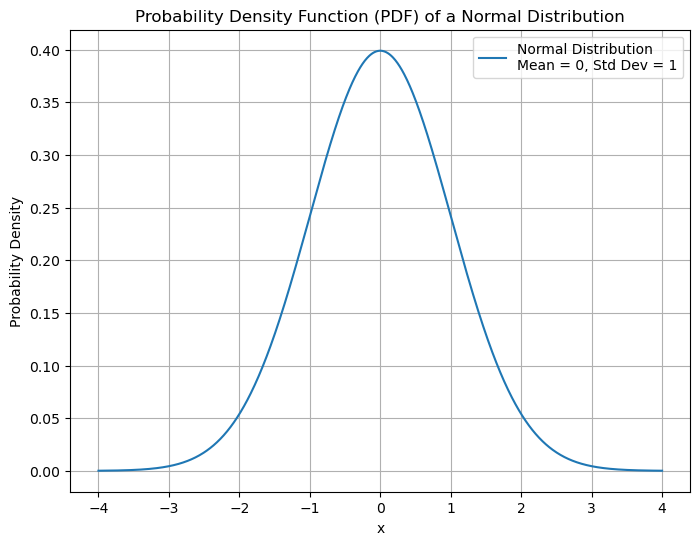

In [21]:
# Parameters for the normal distribution
mean = 0
std_dev = 1

# Generate a range of x values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Compute the PDF values
pdf = norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Normal Distribution\nMean = {mean}, Std Dev = {std_dev}')
plt.title('Probability Density Function (PDF) of a Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

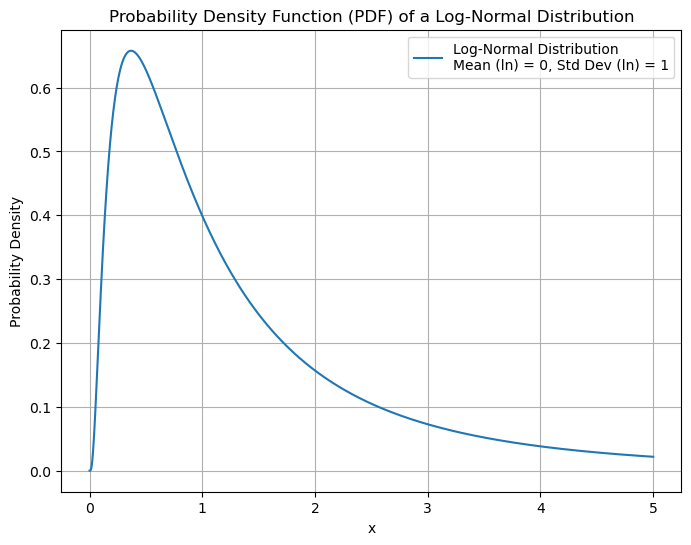

In [22]:
# Parameters for the log-normal distribution
mean = 0
std_dev = 1
sigma = std_dev  # Standard deviation of the underlying normal distribution

# Generate a range of x values
x = np.linspace(0, 5, 1000)  # Start from 0 because the log-normal distribution is defined for x > 0

# Compute the PDF values
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mean))

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Log-Normal Distribution\nMean (ln) = {mean}, Std Dev (ln) = {std_dev}')
plt.title('Probability Density Function (PDF) of a Log-Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

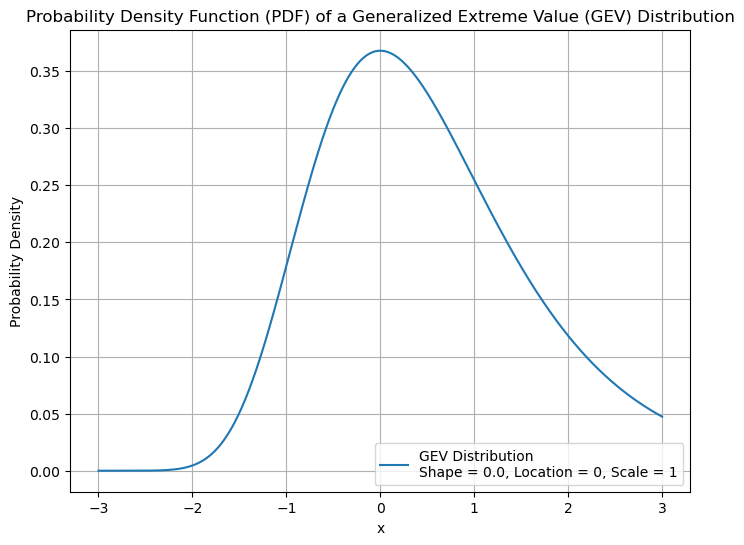

In [23]:
# Parameters for the GEV distribution
shape = 0.0  # Gumbel type (can be negative for Weibull, positive for Fréchet)
loc = 0      # Location parameter
scale = 1    # Scale parameter

# Generate a range of x values
x = np.linspace(-3, 3, 1000)

# Compute the PDF values
pdf = genextreme.pdf(x, c=shape, loc=loc, scale=scale)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'GEV Distribution\nShape = {shape}, Location = {loc}, Scale = {scale}')
plt.title('Probability Density Function (PDF) of a Generalized Extreme Value (GEV) Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
data = pd.read_csv('wind speed_Central Park_NY_predictions.csv')

In [25]:
obs = data['AWND'].values
obs


array([2.7, 1.4, 1.7, 1.3, 0.7, 0.6, 1.8, 0.9, 1. , 1.4, 2.1, 0.6, 0.7,
       1.1, 1.1, 1.7, 1.3, 1.2, 1.3, 0.9, 1.2, 1.2, 1.8, 1.9, 1.3, 2.3,
       1.6, 1.7, 1.3, 1.3, 1.5])

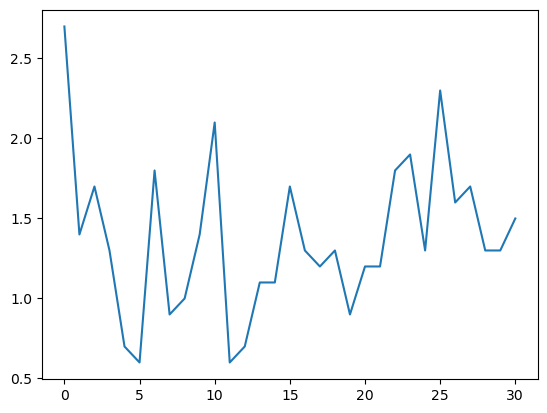

In [26]:
plt.plot(np.arange(len(obs)), obs, '-')

In [27]:
pred = obs + np.random.normal(0,0.3,len(obs))

In [28]:
pred

array([2.58223549, 1.36955779, 1.2367666 , 1.26171487, 0.69063187,
       0.44416395, 2.00047151, 1.1327966 , 0.65399457, 1.30858303,
       1.92164814, 0.42236158, 0.66029853, 0.96795068, 0.68632446,
       1.91263491, 1.26454624, 1.14011935, 1.11383338, 0.82326792,
       1.48855   , 1.65741847, 1.55244138, 2.08072782, 0.8870897 ,
       2.17213222, 1.57962   , 1.83920565, 1.1247247 , 1.31431956,
       2.06413656])

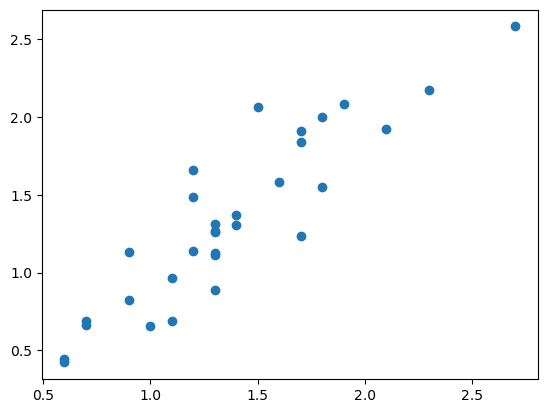

In [29]:
plt.plot(obs, pred, 'o')

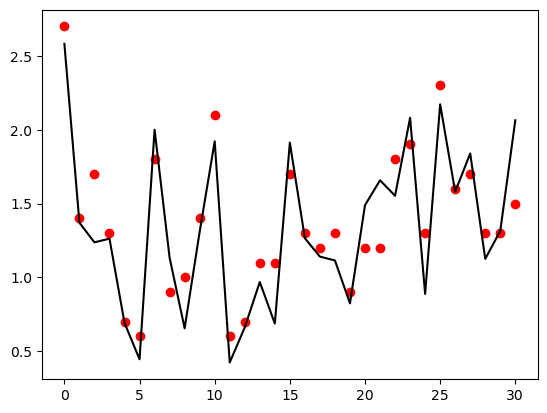

In [30]:
plt.plot(np.arange(len(obs)), obs, 'or', np.arange(len(pred)), pred, 'k')

In [31]:
np.mean((obs - pred)**2)

0.056904580726887026

In [32]:
np.sqrt(np.mean((obs - pred)**2))

0.2385468103473342

In [33]:
np.mean(abs(obs - pred))

0.18794369805072547

In [34]:
np.mean(obs-pred)

0.04018491763713323

In [35]:
np.mean(obs-pred) / np.mean(obs)

0.02924254569838334

In [36]:
np.corrcoef(obs,pred)[0,1]

0.9013805095923192